In [37]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
# import torch
# import torch.nn as nn
# import torch.optim as optim

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
np.random.seed(42)
# torch.manual_seed(42)



### **1. Data Cleaning**
- **First Step**: Start with **data cleaning**. This includes:
  - Handling **missing values** (e.g., imputation, removal).
  - **Renaming and simplifying** columns.
  - **Removing duplicates** and **correcting inconsistencies**.
  - Handling **outliers**, especially in numerical features that could distort analysis and modeling.

### **2. Exploratory Data Analysis (EDA)**
- **Next Step**: Perform **EDA** to gain insights and understand your data.
  - Visualize **relationships** between features (like job type, education level) and the target variable (job satisfaction).
  - Look for **patterns**, distributions, and **correlations**.
  - EDA will help in determining if further transformations are needed (e.g., **normalization**, **bucketing**).
  - It helps in identifying which features might be important for prediction.
  
### **3. Feature Engineering and Encoding**
- Based on insights from EDA:
  - Create **new features** that capture important relationships (e.g., interaction terms between work experience and job type).
  - **Encode categorical variables** (e.g., One-Hot Encoding, Label Encoding).
  - **Normalize/Standardize** features if required, especially for neural networks.

### **4. Train-Test Split**
- **Split the Data**: After cleaning, EDA, and feature engineering, **split the dataset** into **training** and **testing** sets.
  - This ensures that your test set is not affected by any leakage during EDA or feature engineering.
  - Common split ratios are **80/20** or **70/30** for training and testing.

### **5. Model Training**
- **Classical Machine Learning Model**: Train a classical model to establish a **baseline**.
  - You can use models like **linear regression**, **decision trees**, or **random forests**.
- **Deep Learning Model**: Train a **deep learning model** using the **training set** to predict job satisfaction.

### **6. Model Evaluation**
- **Evaluate Both Models**: Use the **test set** to evaluate both classical and deep learning models.
  - Use metrics like **Mean Squared Error (MSE)** for regression or **accuracy** and **F1 score** for classification, depending on the nature of the problem.

### **7. Compare and Interpret Results**
- **Compare** the performance of classical models and deep learning models.
- Provide **interpretations** and actionable insights based on which model performs better and why.

### **Summary of Steps**:
1. **Data Cleaning**: Handle missing values, outliers, and inconsistencies.
2. **Exploratory Data Analysis (EDA)**: Visualize data, understand distributions, relationships, and correlations.
3. **Feature Engineering**: Create new features, encode categorical variables, and normalize features.
4. **Train-Test Split**: Split the cleaned and transformed data into training and test sets.
5. **Model Training**: Train both classical and deep learning models.
6. **Model Evaluation**: Evaluate on test data, compare performances, and derive insights.


Absolutely, data preprocessing is crucial, especially for creating a generalizable model. Let’s outline the steps we should include beyond missing value handling to ensure data completeness and address inconsistencies.

### **Data Preprocessing Plan**:

1. **Missing Value Handling**: (Already discussed)
   - Impute missing values in numerical and categorical features.
   - Drop columns with a high percentage of missing data.

2. **Data Consistency and Completeness**:
   - **Standardize Categorical Values**: Ensure that all categorical features are standardized (e.g., converting all text to lowercase, handling typos or inconsistencies).
   - **Handle Mixed Formats**: Ensure all numerical values are in the correct format and scale (e.g., years vs. months).
   - **Address Unit Inconsistencies**: For any features that involve units (e.g., salary, years of experience), make sure they are consistent (e.g., all salary figures in the same currency).

3. **Feature Engineering**:
   - **Encoding Categorical Variables**:
     - Use **One-Hot Encoding** for categorical features such as `DeveloperType_Simplified`, `RemoteStatus`, and `Employment_Simplified`.
     - For deep learning, consider using **embedding layers** for high-cardinality features.
   - **Normalization/Standardization**:
     - **Standardize** numerical features (`WorkExp_Log`, `ConvertedCompYearly_Log`, etc.) to bring all features to a similar scale, which helps deep learning models converge faster.
   - **Feature Creation**: Create new features that may capture meaningful interactions (e.g., interaction between experience and employment type).

4. **Outlier Handling**: (Partially discussed)
   - Ensure that extreme values are capped or transformed to reduce their impact on the model.
   - Outliers in `ConvertedCompYearly` and `WorkExp` have already been capped to the **99th percentile**.

5. **Data Splitting**:
   - Ensure the data is split into **train** and **test** sets before imputation and preprocessing to avoid data leakage.



In [38]:

data = pd.read_csv('survey_results_public.csv')



In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_column = 'JobSat'  # Original name before renaming
features = data.drop(columns=[target_column])
target = data[target_column]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [40]:
X_train.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly
21043,21044,I am a developer by profession,18-24 years old,"Not employed, but looking for work",NaN,Apples,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;How-to videos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
48338,48339,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40020,40021,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time",In-person,Apples,Hobby;School or academic work;Professional dev...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Video-based Onlin...,...,0.0,20.0,25.0,20.0,25.0,10.0,0.0,Appropriate in length,Easy,61789.0
18367,18368,I am a developer by profession,55-64 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Stack Over...,...,10.0,25.0,15.0,30.0,0.0,10.0,0.0,Appropriate in length,Easy,63694.0
24095,24096,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Blogs;Books;Written Tutorials;Stack Overflow;S...,...,0.0,0.0,50.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,42962.0


In [41]:
# Check the extent of missing values in each column after splitting
missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
missing_values_test = X_test.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values in the training and test sets for better understanding
missing_percentage_train = (X_train.isnull().sum() / len(X_train)) * 100
missing_percentage_test = (X_test.isnull().sum() / len(X_test)) * 100

# Create DataFrames to display missing values summary for training and test sets
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display the top columns with the most missing values for training and test datasets
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])


Missing Values Summary - Training Set:
                                Missing Values  Percentage
AIAcc                                    22513   43.005597
AIBen                                    22863   43.674187
AIChallenges                             22311   42.619725
AIComplex                                22740   43.439225
AIEthics                                 19046   36.382739
AINextLess integrated                    50458   96.387706
AINextMore integrated                    32820   62.694607
AINextMuch less integrated               51430   98.244475
AINextMuch more integrated               41648   79.558349
AINextNo change                          42378   80.952836
AISearchDevAdmired                       23955   45.760186
AISearchDevHaveWorkedWith                16784   32.061739
AISearchDevWantToWorkWith                23026   43.985558
AISelect                                  3620    6.915127
AISent                                   15578   29.757971
AIThreat         

In [42]:
# Display all rows of the missing values summary by adjusting the Pandas settings
pd.set_option('display.max_rows', None)


# Sort the missing values summary to understand which columns have the most missing data
missing_summary_train_sorted = missing_summary_train.sort_values(by='Percentage', ascending=False)

# Display the complete sorted list of missing value percentages for each column in the training set
print("Complete List of Missing Values Percentage - Training Set:")
print(missing_summary_train_sorted)

Complete List of Missing Values Percentage - Training Set:
                                Missing Values  Percentage
AINextMuch less integrated               51430   98.244475
AINextLess integrated                    50458   96.387706
AINextNo change                          42378   80.952836
AINextMuch more integrated               41648   79.558349
EmbeddedAdmired                          38974   74.450324
EmbeddedWantToWorkWith                   38276   73.116965
EmbeddedHaveWorkedWith                   34581   66.058568
ConvertedCompYearly                      33624   64.230453
AIToolNot interested in Using            32860   62.771018
AINextMore integrated                    32820   62.694607
Knowledge_9                              30267   57.817723
Frequency_3                              30250   57.785249
ProfessionalTech                         30176   57.643890
Knowledge_8                              30172   57.636249
Knowledge_7                              30153   57.5999

In [43]:
# Import necessary libraries
import pandas as pd

# Assuming the dataset is loaded into a DataFrame named `data`

# Step 1: Check unique values for each column
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")



Unique values in 'ResponseId':
[    1     2     3 ... 65435 65436 65437]


Unique values in 'MainBranch':
['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


Unique values in 'Age':
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


Unique values in 'Employment':
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-ti

In [44]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Features for histogram
# numerical_features = ['Age', 'WorkExp', 'JobSat_WorkEnvironment', 'JobSat_ToolsAndResources', 
#                       'JobSat_CompanyCulture', 'JobSat_ProjectSatisfaction', 'JobSat_Teamwork', 
#                       'JobSat_JobRole', 'JobSat_Management', 'JobSat_Compensation', 
#                       'JobSat_WorkLifeBalance', 'ConvertedCompYearly', 'ExperienceRatio']

# # Setting up the grid layout
# num_features = len(numerical_features)
# num_cols = 4
# num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
# fig.tight_layout(pad=5.0)

# # Plotting each histogram in the grid
# for i, feature in enumerate(numerical_features):
#     row, col = divmod(i, num_cols)
#     sns.histplot(data=df, x=feature, bins=30, kde=True, ax=axes[row, col])
#     axes[row, col].set_title(f'Distribution of {feature}')
#     axes[row, col].set_xlabel(feature)
#     axes[row, col].set_ylabel('Frequency')

# # Hide any empty subplots
# for i in range(num_features, num_rows * num_cols):
#     row, col = divmod(i, num_cols)
#     axes[row, col].axis('off')

# plt.show()


In [45]:
def simplify_age(age):
    if pd.isna(age):
        return 21.0  # Midpoint for 'Unknown'
    elif isinstance(age, str):  # Ensure 'age' is a string before checking its value
        if '18-24' in age:
            return 21.0
        elif '25-34' in age:
            return 29.5
        elif '35-44' in age:
            return 39.5
        elif '45-54' in age:
            return 49.5
        elif '55-64' in age:
            return 59.5
        elif '65' in age:
            return 70.0
    return 21.0  # Default to midpoint for 'Unknown' or other unhandled values

# Apply simplifications to X_train and X_test
# Simplify EdLevel
for df in [X_train, X_test]:
    df['EdLevel'] = df['EdLevel'].replace({
        r"Bachelor.*": 'Bachelor’s Degree',
        r"Master.*": 'Master’s Degree',
        r"Professional.*": 'Professional Degree',
        r"Associate.*": 'Associate Degree',
        r"Primary.*": 'Primary School',
        r"Secondary.*": 'Secondary School',
        r"Some.*": 'Some College',
        r".*else": 'Other'
    }, regex=True)

    # Simplify Employment
    df['Employment'] = df['Employment'].str.split(';').str[0]  # Keep only the first category if there are multiple

    # Simplify RemoteWork
    df['RemoteWork'] = df['RemoteWork'].replace({
        r"Hybrid \(some remote, some in-person\)": 'Hybrid'
    }, regex=True)

    # Simplify CodingActivities
    df['CodingActivities'] = df['CodingActivities'].replace({
        r".*Hobby.*": 'Hobby',
        r".*Professional.*": 'Professional Development'
    }, regex=True)

    # Simplify LearnCode and LearnCodeOnline
    df['LearnCode'] = df['LearnCode'].replace({
        r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
        r".*books.*|.*media.*": 'Books',
        r".*blogs.*": 'Blogs'
    }, regex=True)

    df['LearnCodeOnline'] = df['LearnCodeOnline'].replace({
        r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
        r".*books.*|.*media.*": 'Books',
        r".*blogs.*": 'Blogs'
    }, regex=True)

    # Simplify SurveyEase and SurveyLength
    df['SurveyEase'] = df['SurveyEase'].replace({
        r"Appropriate.*": 'Appropriate',
        r"Easy": 'Easy',
        r".*difficult.*": 'Difficult'
    }, regex=True)

    df['SurveyLength'] = df['SurveyLength'].replace({
        r"Appropriate.*": 'Appropriate',
        r"Too.*": 'Too Long'
    }, regex=True)

    # Simplify Age column using the defined function and convert to numerical
    df['Age'] = df['Age'].apply(lambda x: simplify_age(x))

# Convert appropriate columns to categorical in both X_train and X_test
for df in [X_train, X_test]:
    df['EdLevel'] = df['EdLevel'].astype('category')
    df['Employment'] = df['Employment'].astype('category')
    df['RemoteWork'] = df['RemoteWork'].astype('category')
    df['CodingActivities'] = df['CodingActivities'].astype('category')
    df['LearnCode'] = df['LearnCode'].astype('category')
    df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
    df['SurveyEase'] = df['SurveyEase'].astype('category')
    df['SurveyLength'] = df['SurveyLength'].astype('category')

In [46]:
# # Create a new feature as a ratio of WorkExp to Age
# X_train['ExperienceRatio'] = X_train['WorkExp'] / X_train['Age']
# X_test['ExperienceRatio'] = X_test['WorkExp'] / X_test['Age']


In [47]:
# X_train.ExperienceRatio

In [48]:
# # Define function to simplify age groups
# def simplify_age(age):
#     if pd.isna(age):
#         return 21.0  # Midpoint for 'Unknown'
#     elif isinstance(age, str):  # Ensure 'age' is a string before checking its value
#         if '18-24' in age:
#             return 21.0
#         elif '25-34' in age:
#             return 29.5
#         elif '35-44' in age:
#             return 39.5
#         elif '45-54' in age:
#             return 49.5
#         elif '55-64' in age:
#             return 59.5
#         elif '65' in age:
#             return 70.0
#     return 21.0  # Default to midpoint for 'Unknown' or other unhandled values


# # Apply simplifications to X_train and X_test
# # Simplify EdLevel
# for df in [X_train, X_test]:
#     df['EdLevel'] = df['EdLevel'].replace({
#         r"Bachelor.*": 'Bachelor’s Degree',
#         r"Master.*": 'Master’s Degree',
#         r"Professional.*": 'Professional Degree',
#         r"Associate.*": 'Associate Degree',
#         r"Primary.*": 'Primary School',
#         r"Secondary.*": 'Secondary School',
#         r"Some.*": 'Some College',
#         r".*else": 'Other'
#     }, regex=True)

#     # Simplify Employment
#     df['Employment'] = df['Employment'].str.split(';').str[0]  # Keep only the first category if there are multiple

#     # Simplify RemoteWork
#     df['RemoteWork'] = df['RemoteWork'].replace({
#         r"Hybrid \(some remote, some in-person\)": 'Hybrid'
#     }, regex=True)

#     # Simplify CodingActivities
#     df['CodingActivities'] = df['CodingActivities'].replace({
#         r".*Hobby.*": 'Hobby',
#         r".*Professional.*": 'Professional Development'
#     }, regex=True)

#     # Simplify LearnCode and LearnCodeOnline
#     df['LearnCode'] = df['LearnCode'].replace({
#         r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
#         r".*books.*|.*media.*": 'Books',
#         r".*blogs.*": 'Blogs'
#     }, regex=True)

#     df['LearnCodeOnline'] = df['LearnCodeOnline'].replace({
#         r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
#         r".*books.*|.*media.*": 'Books',
#         r".*blogs.*": 'Blogs'
#     }, regex=True)

#     # Simplify SurveyEase and SurveyLength
#     df['SurveyEase'] = df['SurveyEase'].replace({
#         r"Appropriate.*": 'Appropriate',
#         r"Easy": 'Easy',
#         r".*difficult.*": 'Difficult'
#     }, regex=True)

#     df['SurveyLength'] = df['SurveyLength'].replace({
#         r"Appropriate.*": 'Appropriate',
#         r"Too.*": 'Too Long'
#     }, regex=True)

#     # Simplify Age column using the defined function and convert to numerical
#     df['Age'] = df['Age'].apply(lambda x: simplify_age(x))
    

# # Convert appropriate columns to categorical in both X_train and X_test
# for df in [X_train, X_test]:
#     df['EdLevel'] = df['EdLevel'].astype('category')
#     df['Employment'] = df['Employment'].astype('category')
#     df['RemoteWork'] = df['RemoteWork'].astype('category')
#     df['CodingActivities'] = df['CodingActivities'].astype('category')
#     df['LearnCode'] = df['LearnCode'].astype('category')
#     df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
#     df['SurveyEase'] = df['SurveyEase'].astype('category')
#     df['SurveyLength'] = df['SurveyLength'].astype('category')

In [49]:
X_train.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly
21043,21044,I am a developer by profession,21.0,"Not employed, but looking for work",NaN,Apples,NaN,Bachelor’s Degree,Online Resources,Online Resources,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate,Difficult,NaN
48338,48339,I am learning to code,21.0,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40020,40021,I am a developer by profession,21.0,"Employed, full-time",In-person,Apples,Hobby,Bachelor’s Degree,Online Resources,Online Resources,...,0.0,20.0,25.0,20.0,25.0,10.0,0.0,Appropriate,Easy,61789.0
18367,18368,I am a developer by profession,59.5,"Employed, full-time",Remote,Apples,Hobby,Professional Degree,Online Resources,Technical documentation;Blogs;Books;Stack Over...,...,10.0,25.0,15.0,30.0,0.0,10.0,0.0,Appropriate,Easy,63694.0
24095,24096,I am a developer by profession,49.5,"Employed, full-time",Hybrid,Apples,Hobby,Master’s Degree,Online Resources,Online Resources,...,0.0,0.0,50.0,50.0,0.0,0.0,0.0,Appropriate,Easy,42962.0


In [50]:
# Identify columns with missing values between 40% and 80%
columns_40_80_missing = missing_summary_train[
    (missing_summary_train['Percentage'] > 40) & (missing_summary_train['Percentage'] <= 80)
].index

# Extract the columns with 40-80% missing values from the training dataset
X_train_40_80 = X_train[columns_40_80_missing]

# Filter only numerical columns for correlation analysis
numerical_columns_40_80 = X_train_40_80.select_dtypes(include=['int64', 'float64']).columns

# Combine these numerical columns with the target variable for correlation analysis
data_for_correlation = pd.concat([X_train_40_80[numerical_columns_40_80], y_train], axis=1)

# Calculate the correlation of features with 'Job Satisfaction' (target variable)
correlation_matrix = data_for_correlation.corr()

# Extract the correlation values for 'JobSat' column and sort by absolute value to see the importance
correlation_with_target = correlation_matrix['JobSat'].sort_values(key=abs, ascending=False)

# Display the correlation values for features with 'JobSat' to determine their importance
print("Correlation with Job Satisfaction for Features with 40-80% Missing Values:")
correlation_with_target


Correlation with Job Satisfaction for Features with 40-80% Missing Values:


JobSat                 1.000000
WorkExp                0.097421
JobSatPoints_1         0.095082
JobSatPoints_8         0.056756
JobSatPoints_10        0.048287
JobSatPoints_6         0.047980
JobSatPoints_5         0.047963
ConvertedCompYearly    0.045765
JobSatPoints_11        0.044905
JobSatPoints_9         0.040323
JobSatPoints_7         0.037790
JobSatPoints_4         0.030992
CompTotal             -0.010429
Name: JobSat, dtype: float64

In [51]:
# Rename columns in X_train and X_test
X_train.rename(columns={
    'JobSatPoints_1': 'JobSat_WorkEnvironment',
    'JobSatPoints_4': 'JobSat_ToolsAndResources',
    'JobSatPoints_5': 'JobSat_CompanyCulture',
    'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
    'JobSatPoints_7': 'JobSat_Teamwork',
    'JobSatPoints_8': 'JobSat_JobRole',
    'JobSatPoints_9': 'JobSat_Management',
    'JobSatPoints_10': 'JobSat_Compensation',
    'JobSatPoints_11': 'JobSat_WorkLifeBalance'
}, inplace=True)

X_test.rename(columns={
    'JobSatPoints_1': 'JobSat_WorkEnvironment',
    'JobSatPoints_4': 'JobSat_ToolsAndResources',
    'JobSatPoints_5': 'JobSat_CompanyCulture',
    'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
    'JobSatPoints_7': 'JobSat_Teamwork',
    'JobSatPoints_8': 'JobSat_JobRole',
    'JobSatPoints_9': 'JobSat_Management',
    'JobSatPoints_10': 'JobSat_Compensation',
    'JobSatPoints_11': 'JobSat_WorkLifeBalance'
}, inplace=True)


In [52]:
X_train.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSat_CompanyCulture,JobSat_ProjectSatisfaction,JobSat_Teamwork,JobSat_JobRole,JobSat_Management,JobSat_Compensation,JobSat_WorkLifeBalance,SurveyLength,SurveyEase,ConvertedCompYearly
21043,21044,I am a developer by profession,21.0,"Not employed, but looking for work",NaN,Apples,NaN,Bachelor’s Degree,Online Resources,Online Resources,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate,Difficult,NaN
48338,48339,I am learning to code,21.0,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40020,40021,I am a developer by profession,21.0,"Employed, full-time",In-person,Apples,Hobby,Bachelor’s Degree,Online Resources,Online Resources,...,0.0,20.0,25.0,20.0,25.0,10.0,0.0,Appropriate,Easy,61789.0
18367,18368,I am a developer by profession,59.5,"Employed, full-time",Remote,Apples,Hobby,Professional Degree,Online Resources,Technical documentation;Blogs;Books;Stack Over...,...,10.0,25.0,15.0,30.0,0.0,10.0,0.0,Appropriate,Easy,63694.0
24095,24096,I am a developer by profession,49.5,"Employed, full-time",Hybrid,Apples,Hobby,Master’s Degree,Online Resources,Online Resources,...,0.0,0.0,50.0,50.0,0.0,0.0,0.0,Appropriate,Easy,42962.0



### **Analysis of Correlation Values**:
- Features like **`WorkExp`**, **`JobSatPoints_1`**, and **`JobSatPoints_8`** have the **highest positive correlation** with job satisfaction (though still relatively low, around 0.1).
- **`ConvertedCompYearly`** and **`CompTotal`** have very low correlations, suggesting that they may not be as impactful for predicting job satisfaction.
- The correlations are all **below 0.1**, indicating that none of these features have a very strong relationship with `Job Satisfaction`.

### **Recommended Actions**:

1. **Keep Features with Some Correlation**:
   - **`WorkExp`** and **`JobSatPoints_1` to `JobSatPoints_8`** have some correlation, though it's not particularly strong. These features could still be useful for building a model, especially considering interactions with other features.
   - **Imputation**: Use **KNN imputation** or **median imputation** for missing values in these features to preserve their relationships.

2. **Drop Features with Very Low Correlation**:
   - **`CompTotal`** has a very low correlation with `Job Satisfaction`. It may not add significant predictive power to the model and can be dropped to simplify the dataset.
   - **`ConvertedCompYearly`** has a low correlation, but it might still be contextually significant for salary analysis. Consider **retaining** if salary is an important dimension for understanding satisfaction, otherwise, **drop it**.

3. **Imputation Strategy**:
   - **KNN Imputation**:
     - Use KNN imputation for features that show moderate importance (e.g., `WorkExp` and job satisfaction point-related features).
   - **Median/Mode Imputation**:
     - Use median imputation for numerical features that are retained and have some missing values.
   - **Create Indicator Flags**:
     - For features that were imputed, create **indicator flags** to mark which values were missing.

### Next Steps:
- **Drop the features** that have very low or no correlation (`CompTotal`, possibly `ConvertedCompYearly`).
- **Impute missing values** for the rest using KNN for the moderately correlated features and median/mode imputation for others.
- **Create binary flags** for features with significant missing values to track imputation.


In [53]:
# # Box Plot for Job Satisfaction by Job Role
# plt.figure(figsize=(15, 7))
# sns.boxplot(x='JobSat_JobRole', y='ConvertedCompYearly', data=df)
# plt.xticks(rotation=90)
# plt.title('Job Satisfaction by Job Role')
# plt.xlabel('Job Role')
# plt.ylabel('Job Satisfaction')
# plt.show()


In [54]:
# # Correlation Heatmap
# plt.figure(figsize=(20, 15))
# sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap for Numerical Features')
# plt.show()


In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Drop Features with Low Correlation
features_to_drop = ['CompTotal', 'Age']
X_train_cleaned = X_train.drop(columns=features_to_drop)
X_test_cleaned = X_test.drop(columns=features_to_drop)

# Step 2: Impute Missing Values
# Identify numerical and categorical features
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns

# Step 2.1: Find Optimal K for KNN Imputation
# Remove rows with NaN in the target variable for both training and test sets
non_null_train_indices = y_train.notna()
X_train_cleaned = X_train_cleaned[non_null_train_indices]
y_train = y_train[non_null_train_indices]

non_null_test_indices = y_test.notna()
X_test_cleaned = X_test_cleaned[non_null_test_indices]
y_test = y_test[non_null_test_indices]

# Split a subset of training data for finding optimal k
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)

k_values = [5]
scores = []

for k in k_values:
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = knn_imputer.fit_transform(X_train_split[numerical_features])
    X_val_imputed = knn_imputer.transform(X_val_split[numerical_features])

    # Create DataFrames from the imputed numerical features
    X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=numerical_features, index=X_train_split.index)
    X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=numerical_features, index=X_val_split.index)

    # Concatenate categorical features back to the imputed numerical DataFrame
    X_train_imputed_df = pd.concat([X_train_imputed_df, X_train_split[categorical_features]], axis=1)
    X_val_imputed_df = pd.concat([X_val_imputed_df, X_val_split[categorical_features]], axis=1)

    # Train a model (e.g., linear regression) to evaluate the imputation
    model = LinearRegression()
    model.fit(X_train_imputed_df[numerical_features], y_train_split)
    score = cross_val_score(model, X_val_imputed_df[numerical_features], y_val_split, cv=5, scoring='r2').mean()
    scores.append((k, score))

# Find the optimal k value
best_k = max(scores, key=lambda item: item[1])[0]
print(f"Optimal value for k: {best_k}")

# Step 2.2: KNN Imputation with Optimal k
knn_imputer = KNNImputer(n_neighbors=best_k)
X_train_cleaned[numerical_features] = knn_imputer.fit_transform(X_train_cleaned[numerical_features])
X_test_cleaned[numerical_features] = knn_imputer.transform(X_test_cleaned[numerical_features])

# Convert appropriate columns to categorical in both X_train_cleaned and X_test_cleaned
for df in [X_train_cleaned, X_test_cleaned]:
    df['EdLevel'] = df['EdLevel'].astype('category')
    df['Employment'] = df['Employment'].astype('category')
    df['RemoteWork'] = df['RemoteWork'].astype('category')
    df['CodingActivities'] = df['CodingActivities'].astype('category')
    df['LearnCode'] = df['LearnCode'].astype('category')
    df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
    df['SurveyEase'] = df['SurveyEase'].astype('category')
    df['SurveyLength'] = df['SurveyLength'].astype('category')

# Display the updated DataFrame for X_train_cleaned
X_train_cleaned.head()


# # Step 2: Impute Missing Values
# # Identify numerical and categorical features
# numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns

# # Step 2.1: KNN Imputation for Important Numerical Features
# # Apply KNN Imputer to numerical features that show moderate correlation with the target
# important_numerical_features = ['WorkExp', 'JobSat_WorkEnvironment', 'JobSat_JobRole', 'JobSat_Compensation', 
#                                 'JobSat_ProjectSatisfaction', 'JobSat_CompanyCulture', 'JobSat_WorkLifeBalance', 
#                                 'JobSat_Management', 'JobSat_Teamwork', 'JobSat_ToolsAndResources']

# knn_imputer = KNNImputer(n_neighbors=4)
# X_train_cleaned[important_numerical_features] = knn_imputer.fit_transform(X_train_cleaned[important_numerical_features])
# X_test_cleaned[important_numerical_features] = knn_imputer.transform(X_test_cleaned[important_numerical_features])

# # Convert appropriate columns to categorical in both X_train_cleaned and X_test_cleaned
# for df in [X_train_cleaned, X_test_cleaned]:
#     df['EdLevel'] = df['EdLevel'].astype('category')
#     df['Employment'] = df['Employment'].astype('category')
#     df['RemoteWork'] = df['RemoteWork'].astype('category')
#     df['CodingActivities'] = df['CodingActivities'].astype('category')
#     df['LearnCode'] = df['LearnCode'].astype('category')
#     df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
#     df['SurveyEase'] = df['SurveyEase'].astype('category')
#     df['SurveyLength'] = df['SurveyLength'].astype('category')

# # Display the updated DataFrame for X_train_cleaned
# X_train_cleaned.head()

Optimal value for k: 5


,ResponseId,MainBranch,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSat_CompanyCulture,JobSat_ProjectSatisfaction,JobSat_Teamwork,JobSat_JobRole,JobSat_Management,JobSat_Compensation,JobSat_WorkLifeBalance,SurveyLength,SurveyEase,ConvertedCompYearly
40020,40021.0,I am a developer by profession,"Employed, full-time",In-person,Apples,Hobby,Bachelor’s Degree,Online Resources,Online Resources,NaN,...,0.0,20.0,25.0,20.0,25.0,10.0,0.0,Appropriate,Easy,61789.0
18367,18368.0,I am a developer by profession,"Employed, full-time",Remote,Apples,Hobby,Professional Degree,Online Resources,Technical documentation;Blogs;Books;Stack Over...,API document(s) and/or SDK document(s);First-p...,...,10.0,25.0,15.0,30.0,0.0,10.0,0.0,Appropriate,Easy,63694.0
24095,24096.0,I am a developer by profession,"Employed, full-time",Hybrid,Apples,Hobby,Master’s Degree,Online Resources,Online Resources,NaN,...,0.0,0.0,50.0,50.0,0.0,0.0,0.0,Appropriate,Easy,42962.0
682,683.0,I am a developer by profession,"Employed, full-time",Remote,Apples,Hobby,Master’s Degree,Online Resources,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);First-p...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate,Easy,56022.0
9767,9768.0,"I am not primarily a developer, but I write co...","Employed, full-time",Remote,Apples,Hobby,Master’s Degree,Online Resources,Online Resources,API document(s) and/or SDK document(s);User gu...,...,0.0,10.0,25.0,30.0,25.0,0.0,0.0,Too Long,Difficult,125000.0


In [56]:
# # Rename columns in X_train and X_test
# X_train.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)

# X_test.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)


In [57]:
# Step 2.2: Check Missing Value Percentages After KNN Imputation
missing_values_train = X_train_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_train = (X_train_cleaned.isnull().sum() / len(X_train_cleaned)) * 100
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})

missing_values_test = X_test_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_test = (X_test_cleaned.isnull().sum() / len(X_test_cleaned)) * 100
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display missing value summaries
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])

# Continue with Median and Mode Imputation for Remaining Features if needed


Missing Values Summary - Training Set:
                                Missing Values  Percentage
AIAcc                                     8763   37.656310
AIBen                                     8942   38.425508
AIChallenges                              7163   30.780800
AIComplex                                 8827   37.931331
AIEthics                                  6259   26.896137
AINextLess integrated                    22424   96.360277
AINextMore integrated                    13221   56.813201
AINextMuch less integrated               22864   98.251042
AINextMuch more integrated               17894   76.893988
AINextNo change                          18208   78.243307
AISearchDevAdmired                        8538   36.689442
AISearchDevHaveWorkedWith                 5185   22.280951
AISearchDevWantToWorkWith                 8075   34.699841
AISent                                    5415   23.269305
AIThreat                                  5417   23.277900
AIToolCurrently U

In [58]:
# Step 1: Drop Features with Excessive Missing Values (above 80%)
threshold = 80
features_to_drop_due_to_missingness = missing_summary_train[missing_summary_train['Percentage'] > threshold].index.tolist()
# X_train_cleaned.drop(columns=features_to_drop_due_to_missingness, inplace=True)
# X_test_cleaned.drop(columns=features_to_drop_due_to_missingness, inplace=True)


X_train_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_train_cleaned.columns], inplace=True)
X_test_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_test_cleaned.columns], inplace=True)



In [59]:
# Step 1: Re-identify Numerical and Categorical Features After Cleaning
categorical_features = X_train_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['MainBranch', 'Employment', 'RemoteWork', 'Check', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'BuildvsBuy', 'TechEndorse', 'Country', 'Currency',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired',
       'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired',
       'OpSysPersonal use', 'OpSysP

In [60]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2.3: Median Imputation for Remaining Numerical Features
important_numerical_features = ['WorkExp', 'JobSat_WorkEnvironment', 'JobSat_JobRole', 'JobSat_Compensation', 
                                'JobSat_ProjectSatisfaction', 'JobSat_CompanyCulture', 'JobSat_WorkLifeBalance', 
                                'JobSat_Management', 'JobSat_Teamwork', 'JobSat_ToolsAndResources']

for feature in numerical_features:
    if feature not in important_numerical_features:
        median_value = X_train_cleaned[feature].median()
        X_train_cleaned[feature] = X_train_cleaned[feature].fillna(median_value)
        X_test_cleaned[feature] = X_test_cleaned[feature].fillna(median_value)

# Step 2.4: Mode Imputation for Categorical Features
for feature in categorical_features:
    if feature in X_train_cleaned.columns:  # Ensure feature exists in cleaned dataset
        mode_value = X_train_cleaned[feature].mode()[0]
        X_train_cleaned[feature] = X_train_cleaned[feature].fillna(mode_value)
        X_test_cleaned[feature] = X_test_cleaned[feature].fillna(mode_value)

# # Step 2.5: Create Binary Flags for Missing Values Imputed
# missing_flags_train = {}
# missing_flags_test = {}

# for feature in X_train_cleaned.columns:
#     if feature in X_train.columns:  # Make sure to check original missing values from the initial dataset
#         if X_train[feature].isnull().sum() > 0:
#             missing_flags_train[feature + '_missing_flag'] = X_train[feature].isnull().astype(int)
#             missing_flags_test[feature + '_missing_flag'] = X_test[feature].isnull().astype(int)

# # Convert the dictionary to a DataFrame and concatenate it with the original training and testing data
# missing_flags_train_df = pd.DataFrame(missing_flags_train, index=X_train_cleaned.index)
# missing_flags_test_df = pd.DataFrame(missing_flags_test, index=X_test_cleaned.index)

# Concatenate the missing flags to the cleaned DataFrame
# X_train_cleaned = pd.concat([X_train_cleaned, missing_flags_train_df], axis=1)
# X_test_cleaned = pd.concat([X_test_cleaned, missing_flags_test_df], axis=1)

# Concatenate the missing flags to the cleaned DataFrame
X_train_cleaned = pd.concat([X_train_cleaned], axis=1)
X_test_cleaned = pd.concat([X_test_cleaned], axis=1)

# Step 3: Encoding and Scaling
# Check for any missing columns in X_train_cleaned before separating low and high cardinality categorical features
available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# Separate low and high cardinality categorical features
low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# Apply OneHotEncoder only to low-cardinality features
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)
    ]
)

# Include scaling in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('scaler', StandardScaler(with_mean=False))
])

# Fit the pipeline on training data and transform both train and test sets
X_train_transformed = pipeline.fit_transform(X_train_cleaned)
X_test_transformed = pipeline.transform(X_test_cleaned)

# Get column names after transformation
numeric_feature_names = numerical_features.tolist()
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(low_cardinality_features).tolist()

# Combine column names
all_feature_names = numeric_feature_names + onehot_feature_names

# Create DataFrames from transformed data with proper column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# # Display the cleaned and imputed datasets for verification
# print("Transformed Training Data Overview:")
# print(X_train_transformed_df.head())

# print("\nTransformed Testing Data Overview:")
# print(X_test_transformed_df.head())


In [61]:
X_train_transformed_df.head()

,ResponseId,WorkExp,JobSat_WorkEnvironment,JobSat_ToolsAndResources,JobSat_CompanyCulture,JobSat_ProjectSatisfaction,JobSat_Teamwork,JobSat_JobRole,JobSat_Management,JobSat_Compensation,...,ProfessionalQuestion_AI-powered search (free),ProfessionalQuestion_AI-powered search (paid),"ProfessionalQuestion_Do search of internal share drives/storage locations for documentation (i.e., not a structured knowledge base)",ProfessionalQuestion_Internal Developer portal,ProfessionalQuestion_Microsoft Teams search,ProfessionalQuestion_Other:,ProfessionalQuestion_Slack search,ProfessionalQuestion_Traditional public search engine,SurveyLength_Too Long,SurveyEase_Easy
40020,2.313536,0.108668,0.000000,0.000000,0.000000,0.738659,0.923390,0.764715,1.001391,0.435896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
18367,1.061818,3.803397,0.384896,0.000000,0.458719,0.923324,0.554034,1.147073,0.000000,0.435896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
24095,1.392943,2.716712,0.000000,0.000000,0.000000,0.000000,1.846781,1.911788,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
682,0.039483,2.608043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
9767,0.564669,1.956033,0.000000,0.540035,0.000000,0.369329,0.923390,1.147073,1.001391,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,2.125886,0.000000


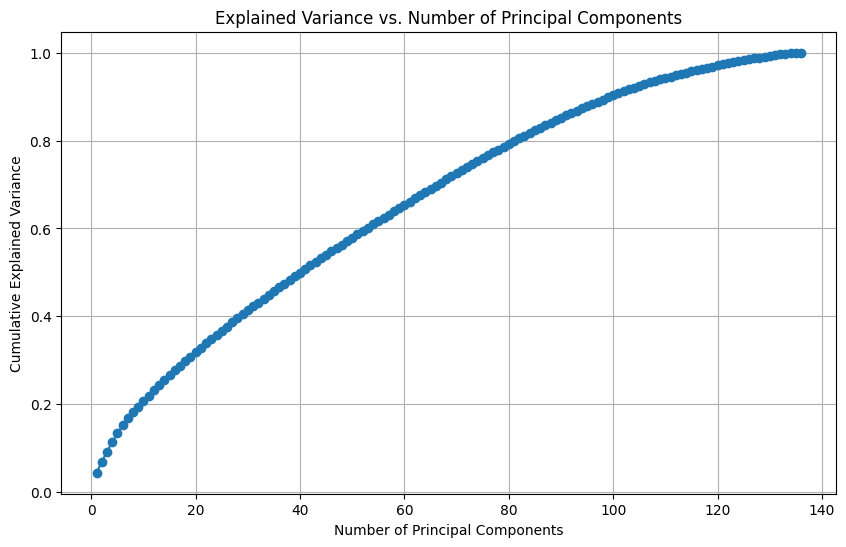

Number of components to retain 95% variance: 113
PCA-transformed Training Data Overview:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
40020 -0.555429  1.781256 -2.234088 -1.998675  0.863905  0.126136 -0.959201   
18367 -0.496147  2.397376 -0.938815  1.816565 -0.164584 -0.914904  0.497661   
24095 -0.297903  2.527318  1.876133 -1.775537  0.950174 -0.434677 -0.125319   
682   -1.990685  0.634153 -0.094763 -1.844134 -1.395385 -2.801546  1.580021   
9767  -0.634293 -0.177538 -0.429052  1.900498 -0.331290 -1.484752  1.505677   

            PC8       PC9      PC10  ...     PC104     PC105     PC106  \
40020  0.875510 -2.462777  1.511750  ...  0.295839  1.044049 -0.420803   
18367  0.414330  3.031747  1.121410  ...  0.533665  0.534032  0.760444   
24095  0.069937 -0.272764 -0.256016  ... -0.276772  0.295351 -0.438080   
682    0.438121  1.071782 -0.394579  ...  0.393474 -0.129949 -0.344080   
9767  -1.001804  0.478275 -1.083814  ...  0.203929 -0.972397 -1.30

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Standardize the data - You have already done this in your pipeline
# Assuming X_train_transformed_df and X_test_transformed_df are already standardized

# Step 2: Apply PCA
# We will first determine the optimal number of components that explain most of the variance
pca = PCA()
pca.fit(X_train_transformed_df)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Step 3: Choose the number of components that explain a significant amount of variance (e.g., 95%)
# Let's say we want to keep at least 95% of the variance
n_components = next(x for x, val in enumerate(explained_variance_ratio_cumulative) if val >= 0.95) + 1

print(f"Number of components to retain 95% variance: {n_components}")

# Step 4: Apply PCA to the dataset with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_transformed_df)
X_test_pca = pca.transform(X_test_transformed_df)

# Convert the PCA result into a DataFrame (optional)
pca_columns = [f'PC{i+1}' for i in range(n_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train_transformed_df.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test_transformed_df.index)

# Display some information for verification
print("PCA-transformed Training Data Overview:")
print(X_train_pca_df.head())

print("\nPCA-transformed Testing Data Overview:")
print(X_test_pca_df.head())

# You can save the PCA-transformed data to CSV files if needed
X_train_pca_df.to_csv('X_train_pca.csv', index=False)
X_test_pca_df.to_csv('X_test_pca.csv', index=False)


In [63]:
# # Save the transformed training and testing datasets to CSV files
# X_train_transformed_df.to_csv('X_train_transformed.csv', index=False)
# X_test_transformed_df.to_csv('X_test_transformed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Data saved successfully to CSV files.")


In [64]:
# Display the cleaned and imputed datasets for verification
print("Transformed Training Data Overview:")
X_train_transformed_df.head()

# print("\nTransformed Testing Data Overview:")
# X_test_transformed_df.head()


Transformed Training Data Overview:


,ResponseId,WorkExp,JobSat_WorkEnvironment,JobSat_ToolsAndResources,JobSat_CompanyCulture,JobSat_ProjectSatisfaction,JobSat_Teamwork,JobSat_JobRole,JobSat_Management,JobSat_Compensation,...,ProfessionalQuestion_AI-powered search (free),ProfessionalQuestion_AI-powered search (paid),"ProfessionalQuestion_Do search of internal share drives/storage locations for documentation (i.e., not a structured knowledge base)",ProfessionalQuestion_Internal Developer portal,ProfessionalQuestion_Microsoft Teams search,ProfessionalQuestion_Other:,ProfessionalQuestion_Slack search,ProfessionalQuestion_Traditional public search engine,SurveyLength_Too Long,SurveyEase_Easy
40020,2.313536,0.108668,0.000000,0.000000,0.000000,0.738659,0.923390,0.764715,1.001391,0.435896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
18367,1.061818,3.803397,0.384896,0.000000,0.458719,0.923324,0.554034,1.147073,0.000000,0.435896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
24095,1.392943,2.716712,0.000000,0.000000,0.000000,0.000000,1.846781,1.911788,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
682,0.039483,2.608043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,0.000000,2.002161
9767,0.564669,1.956033,0.000000,0.540035,0.000000,0.369329,0.923390,1.147073,1.001391,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01367,2.125886,0.000000


In [65]:
X_train_transformed_df.columns.tolist()

['ResponseId',
 'WorkExp',
 'JobSat_WorkEnvironment',
 'JobSat_ToolsAndResources',
 'JobSat_CompanyCulture',
 'JobSat_ProjectSatisfaction',
 'JobSat_Teamwork',
 'JobSat_JobRole',
 'JobSat_Management',
 'JobSat_Compensation',
 'JobSat_WorkLifeBalance',
 'ConvertedCompYearly',
 'MainBranch_I am learning to code',
 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies',
 'MainBranch_I code primarily as a hobby',
 'MainBranch_I used to be a developer by profession, but no longer am',
 'Employment_Employed, part-time',
 'Employment_Independent contractor, freelancer, or self-employed',
 'Employment_Not employed, and not looking for work',
 'Employment_Not employed, but looking for work',
 'Employment_Student, full-time',
 'Employment_Student, part-time',
 'RemoteWork_In-person',
 'RemoteWork_Remote',
 'EdLevel_Bachelor’s Degree',
 'EdLevel_Master’s Degree',
 'EdLevel_Primary School',
 'EdLevel_Professional Degree',
 'EdLevel_Secondary School',
 'E

In [66]:
# Check missing values in training data
missing_values_train = X_train_transformed_df.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values_train[missing_values_train > 0])

# Check missing values in test data
missing_values_test = X_test_transformed_df.isnull().sum()
print("\nMissing Values in Testing Data:")
print(missing_values_test[missing_values_test > 0])


Missing Values in Training Data:
Series([], dtype: int64)

Missing Values in Testing Data:
Series([], dtype: int64)


In [67]:
# Check if there are any missing values in the training and test sets
any_missing_train = X_train_transformed_df.isnull().values.any()
any_missing_test = X_test_transformed_df.isnull().values.any()

print(f"\nAre there any missing values in the training set? {any_missing_train}")
print(f"Are there any missing values in the test set? {any_missing_test}")



Are there any missing values in the training set? False
Are there any missing values in the test set? False


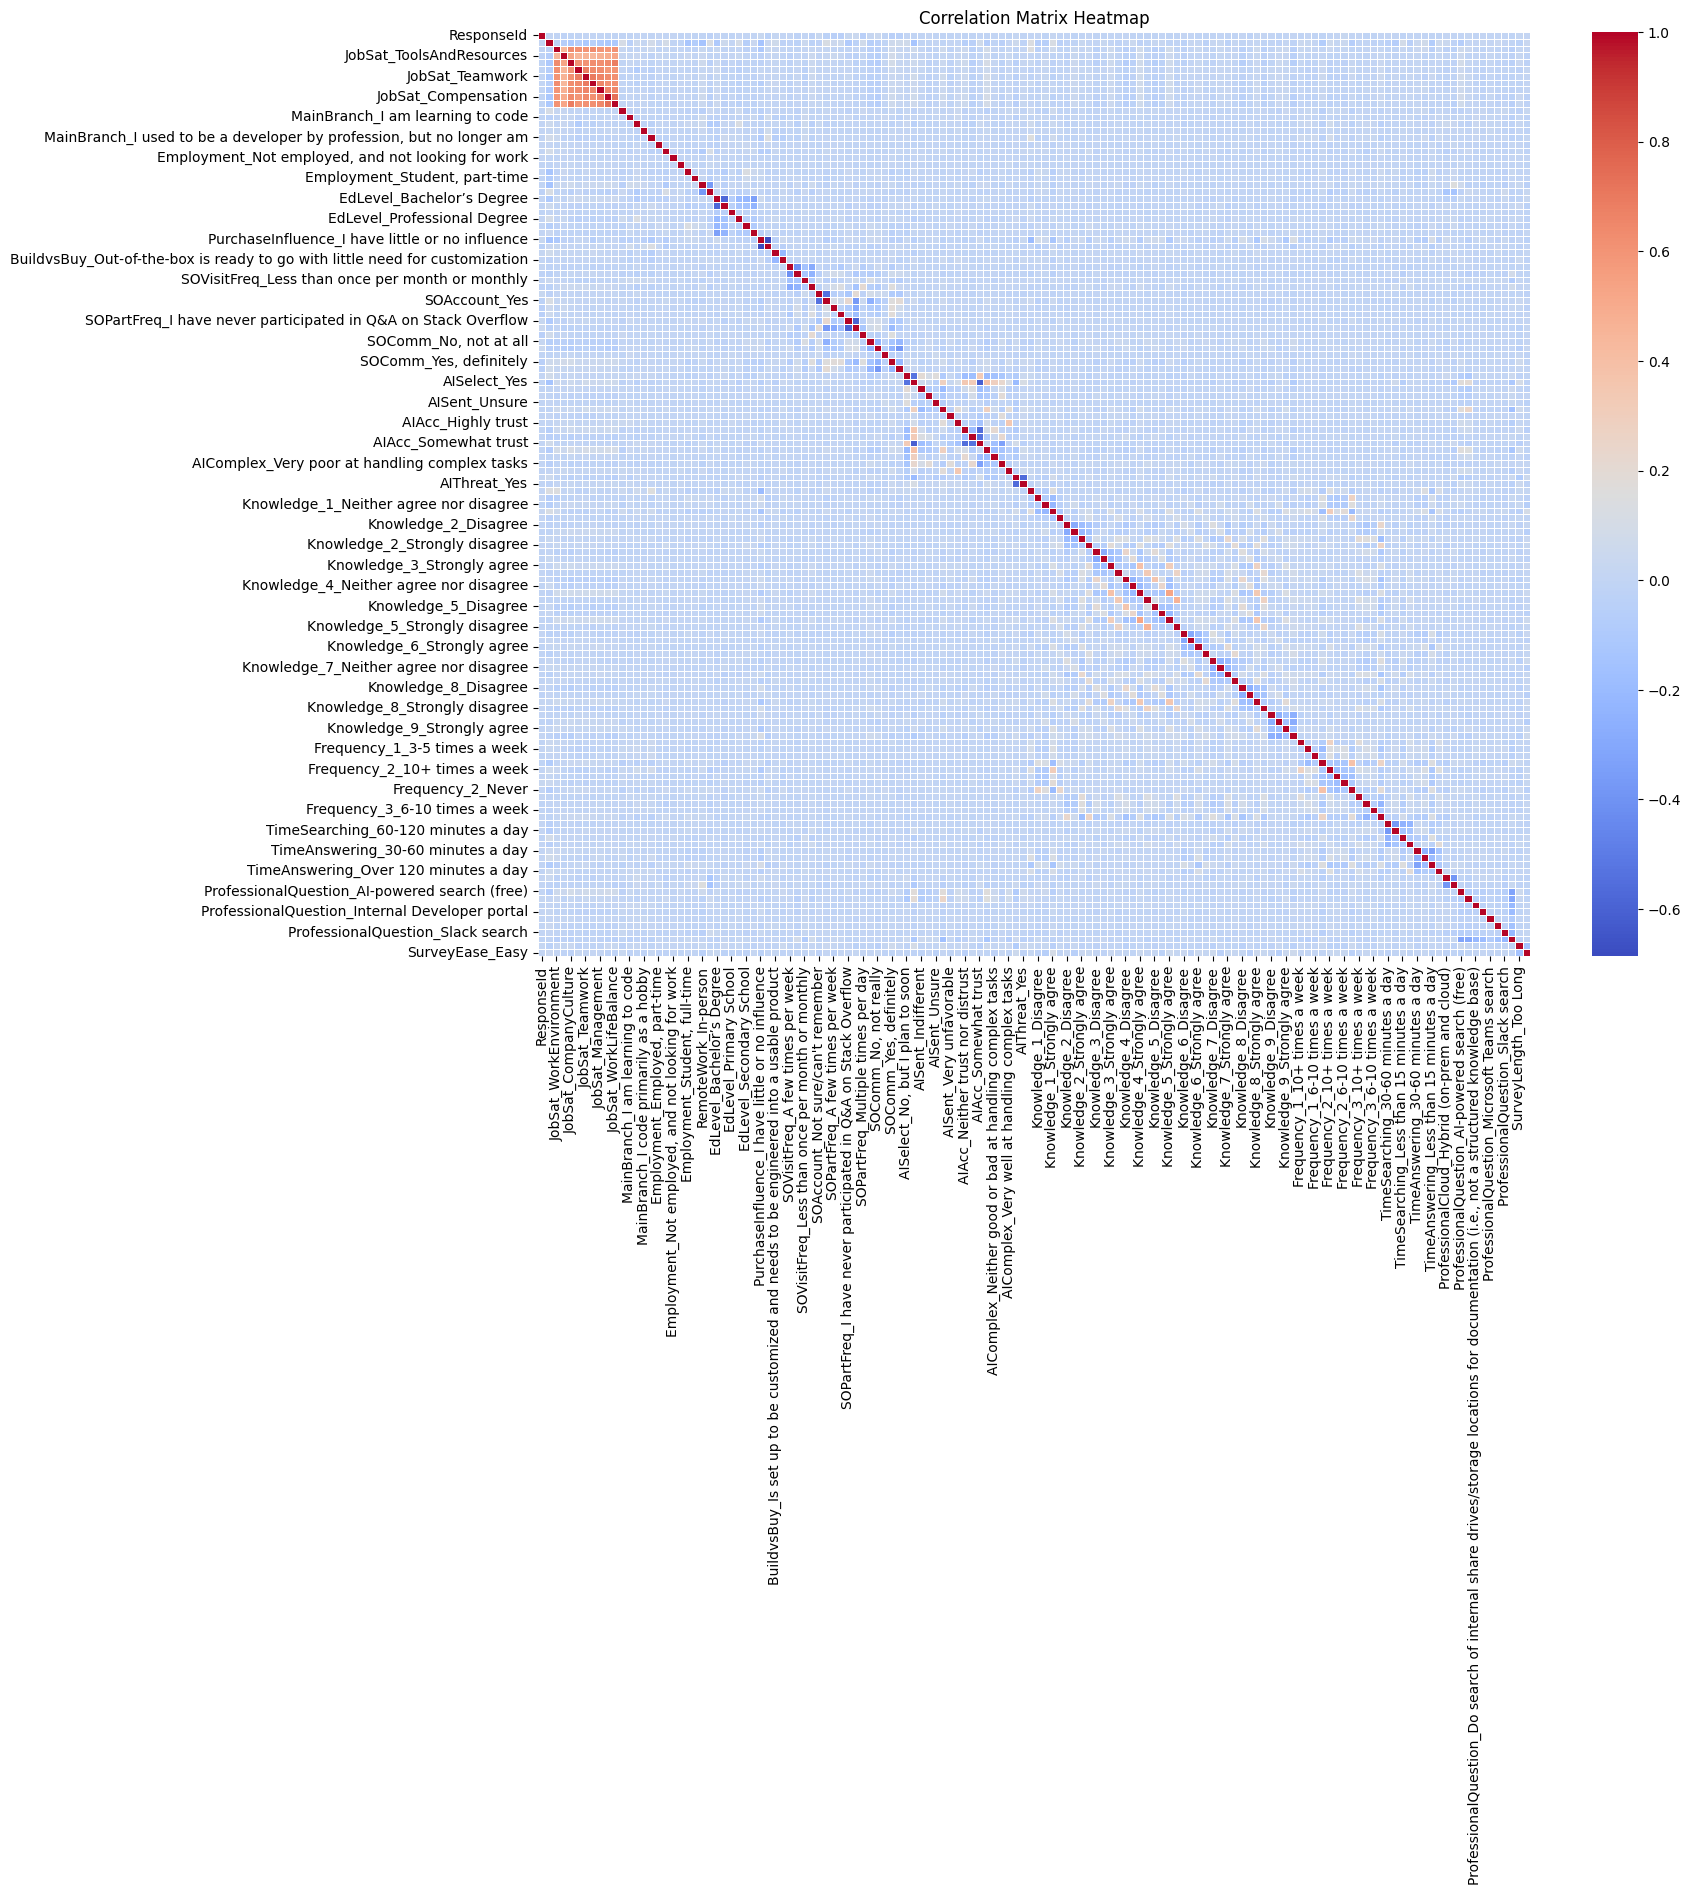

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate correlation matrix
correlation_matrix = X_train_transformed_df.corr()

# Step 2: Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [69]:
# Find highly correlated features
threshold = 0.8  # You can adjust this threshold
highly_correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
for feature1, feature2, correlation in highly_correlated_pairs:
    print(f"{feature1} and {feature2} have a correlation of {correlation:.2f}")


In [75]:
highly_correlated_pairs

[]

In [70]:
# # Example of dropping one feature from each highly correlated pair
# features_to_drop = set()
# for feature1, feature2, _ in highly_correlated_pairs:
#     features_to_drop.add(feature2)  # Drop one of the correlated features

# X_train_reduced = X_train_transformed_df.drop(columns=list(features_to_drop))
# X_test_reduced = X_test_transformed_df.drop(columns=list(features_to_drop))

# print(f"Reduced Training Set Shape: {X_train_reduced.shape}")
# print(f"Reduced Testing Set Shape: {X_test_reduced.shape}")


For the given number of features (121), **Random Forest** can indeed be a good choice for a baseline model, but it's important to weigh its pros and cons against a **Neural Network** model, especially given the differences in the types of problems each model can effectively solve. Let’s look at both:

### 1. **Random Forest as a Baseline**
Random Forest is a solid choice for a baseline model for several reasons:

- **Ease of Use**: Random Forest works well without a lot of hyperparameter tuning. It's generally good at capturing interactions between features, and it doesn’t require feature scaling, which makes it relatively easy to implement and interpret.

- **Handling Many Features**: Random Forest can handle datasets with many features effectively. Since each tree in the forest uses a subset of features, it’s capable of managing a large number of inputs without overfitting too easily.

- **Feature Importance**: Random Forest gives insights into feature importance. With 121 features, it's helpful to have a model that can directly tell you which features are contributing the most. This is useful for feature selection and understanding your data better.

- **Overfitting Risk**: Random Forest is good at avoiding overfitting by aggregating predictions across many trees. However, if you have many correlated features, Random Forest may become less effective.

- **Computational Cost**: Training a Random Forest on 121 features may be computationally intensive depending on the number of estimators (`n_estimators`) and the size of the dataset, but it’s generally feasible on a reasonably powerful machine.

- **Suitability**: Random Forest is well suited for structured/tabular data, which is typically the case when dealing with survey or categorical datasets like yours. It may not be as efficient if the underlying relationships between features are highly complex and nonlinear.

### 2. **Neural Network for Baseline**
Using a **Neural Network** as a baseline model is also possible, but there are a few key considerations:

- **Complexity Handling**: Neural Networks are powerful when dealing with complex relationships and high-dimensional data. If the relationships among the features are nonlinear and complex, a neural network can model these dependencies better than a Random Forest.

- **Scalability**: Neural Networks can scale well with a high number of features. However, the more features you have, the more likely the network will require more hidden layers and neurons to capture relationships effectively, which increases the computational complexity.

- **Hyperparameter Sensitivity**: Neural Networks are more sensitive to hyperparameter choices compared to Random Forest. You need to carefully tune learning rates, the number of layers, activation functions, etc., to get good performance. This makes them more challenging as a baseline compared to Random Forest, which can perform reasonably well with default parameters.

- **Risk of Overfitting**: Neural Networks are prone to overfitting, especially if the dataset isn't large enough. Techniques like dropout, L2 regularization, and early stopping can help, but they add to the complexity of building the model.

- **Training Time**: Neural Networks generally require more time to train compared to Random Forests, especially when the dataset is large or has many features.

- **Feature Engineering Requirement**: Neural Networks often benefit from having informative features. If your features are not particularly engineered to be useful for prediction, a Random Forest may handle the original features more efficiently without extensive feature engineering.

### **Comparison for Baseline Choice**
- **Interpretability**: Random Forest is much easier to interpret, especially with respect to understanding feature importance. Neural Networks tend to be "black boxes" and may not provide direct interpretability, which is often important in the baseline phase.
  
- **Speed and Complexity**: Random Forest is generally faster to train and evaluate, and requires fewer computational resources compared to a Neural Network. This makes Random Forest a strong candidate for a baseline to assess the feasibility of a project quickly.

- **Performance**: Neural Networks can potentially outperform Random Forests if the relationships are complex and there’s enough data for the model to learn from. However, as a baseline, the Random Forest may suffice to give you an idea of the model’s predictive power with simpler hyperparameter tuning.

- **High Feature Count**: Both Random Forest and Neural Networks can handle high feature counts, but Random Forest is often more robust in the early stages of exploration when you don't yet know which features are important. It allows you to quickly identify the most relevant features before moving to more complex models like Neural Networks.

### **Recommendation**
- Start with **Random Forest** as your baseline. It’s easier to implement, interpret, and evaluate, which allows you to quickly determine if your features have predictive power.
- Once you establish a baseline, you can try to optimize the Random Forest and, eventually, move to a **Neural Network** model to potentially improve your performance, especially if you observe that the relationships in your data are highly nonlinear and complex.
- Use **feature importance** from Random Forest to reduce the number of features, and then use those reduced features with a Neural Network to see if it performs better with a simplified, relevant input space.

In short, **Random Forest** is a suitable baseline due to its robustness and simplicity, and you can consider the **Neural Network** afterward for deeper optimization, provided you have enough data and computational resources to train it effectively.

In [71]:
num_columns = X_train_transformed_df.shape[1]
print(f"Number of columns (features) used to train the model: {num_columns}")


Number of columns (features) used to train the model: 136


In [72]:
print("Columns (features) used to train the model:")
X_train_transformed_df.columns.tolist()


Columns (features) used to train the model:


['ResponseId',
 'WorkExp',
 'JobSat_WorkEnvironment',
 'JobSat_ToolsAndResources',
 'JobSat_CompanyCulture',
 'JobSat_ProjectSatisfaction',
 'JobSat_Teamwork',
 'JobSat_JobRole',
 'JobSat_Management',
 'JobSat_Compensation',
 'JobSat_WorkLifeBalance',
 'ConvertedCompYearly',
 'MainBranch_I am learning to code',
 'MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies',
 'MainBranch_I code primarily as a hobby',
 'MainBranch_I used to be a developer by profession, but no longer am',
 'Employment_Employed, part-time',
 'Employment_Independent contractor, freelancer, or self-employed',
 'Employment_Not employed, and not looking for work',
 'Employment_Not employed, but looking for work',
 'Employment_Student, full-time',
 'Employment_Student, part-time',
 'RemoteWork_In-person',
 'RemoteWork_Remote',
 'EdLevel_Bachelor’s Degree',
 'EdLevel_Master’s Degree',
 'EdLevel_Primary School',
 'EdLevel_Professional Degree',
 'EdLevel_Secondary School',
 'E

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define the Random Forest Model with L2-like adjustments
model = RandomForestRegressor(random_state=42)

# Step 2: Define Hyperparameter Search Space
param_distributions = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_features': ['sqrt', 'log2'],  # Number of features considered at each split
    'max_depth': [10, 15, 20, 30],  # Maximum depth of trees (to control overfitting)
    'min_samples_split': [5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4, 6],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Step 3: Set Up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=30,  # Number of iterations
    cv=3,  # Number of folds in cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='neg_mean_squared_error'
)

# Step 4: Fit RandomizedSearchCV on Training Data
random_search.fit(X_train_transformed_df, y_train)

# Step 5: Extract the Best Model
best_model = random_search.best_estimator_

# Step 6: Model Evaluation using the Best Model
# Predict on the training set
y_train_pred = best_model.predict(X_train_transformed_df)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")

# Predict on the test set
y_test_pred = best_model.predict(X_test_transformed_df)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {test_r2}")

# Display the best parameters found
print("Best Hyperparameters: ", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 1.151517896768397
Training R^2: 0.6982192591766313
Test RMSE: 1.8520916696420793
Test R^2: 0.18818838446655095
Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define Models
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()

# Step 2: Define Hyperparameter Grids
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 2000, 5000]
}

lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 2000, 5000]
}

elasticnet_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],   # Mixing parameter between L1 and L2
    'max_iter': [1000, 2000, 5000]
}

# Step 3: Set Up GridSearchCV for Each Model
ridge_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    scoring='neg_mean_squared_error'
)

lasso_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

elasticnet_search = GridSearchCV(
    estimator=elasticnet_model,
    param_grid=elasticnet_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Step 4: Fit GridSearchCV on Training Data
print("Fitting Ridge Regression...")
ridge_search.fit(X_train_transformed_df, y_train)

print("Fitting Lasso Regression...")
lasso_search.fit(X_train_transformed_df, y_train)

print("Fitting ElasticNet Regression...")
elasticnet_search.fit(X_train_transformed_df, y_train)

# Step 5: Extract the Best Models
best_ridge_model = ridge_search.best_estimator_
best_lasso_model = lasso_search.best_estimator_
best_elasticnet_model = elasticnet_search.best_estimator_

# Step 6: Model Evaluation using the Best Models
# Ridge Regression Evaluation
print("\n--- Ridge Regression ---")
y_train_pred_ridge = best_ridge_model.predict(X_train_transformed_df)
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
y_test_pred_ridge = best_ridge_model.predict(X_test_transformed_df)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Training RMSE: {train_rmse_ridge:.2f}, Training R^2: {train_r2_ridge:.2f}")
print(f"Test RMSE: {test_rmse_ridge:.2f}, Test R^2: {test_r2_ridge:.2f}")
print("Best Hyperparameters: ", ridge_search.best_params_)

# Lasso Regression Evaluation
print("\n--- Lasso Regression ---")
y_train_pred_lasso = best_lasso_model.predict(X_train_transformed_df)
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
y_test_pred_lasso = best_lasso_model.predict(X_test_transformed_df)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Training RMSE: {train_rmse_lasso:.2f}, Training R^2: {train_r2_lasso:.2f}")
print(f"Test RMSE: {test_rmse_lasso:.2f}, Test R^2: {test_r2_lasso:.2f}")
print("Best Hyperparameters: ", lasso_search.best_params_)

# ElasticNet Regression Evaluation
print("\n--- ElasticNet Regression ---")
y_train_pred_elasticnet = best_elasticnet_model.predict(X_train_transformed_df)
train_rmse_elasticnet = mean_squared_error(y_train, y_train_pred_elasticnet, squared=False)
train_r2_elasticnet = r2_score(y_train, y_train_pred_elasticnet)
y_test_pred_elasticnet = best_elasticnet_model.predict(X_test_transformed_df)
test_rmse_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet, squared=False)
test_r2_elasticnet = r2_score(y_test, y_test_pred_elasticnet)

print(f"Training RMSE: {train_rmse_elasticnet:.2f}, Training R^2: {train_r2_elasticnet:.2f}")
print(f"Test RMSE: {test_rmse_elasticnet:.2f}, Test R^2: {test_r2_elasticnet:.2f}")
print("Best Hyperparameters: ", elasticnet_search.best_params_)


Fitting Ridge Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting Lasso Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting ElasticNet Regression...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

--- Ridge Regression ---
Training RMSE: 1.85, Training R^2: 0.22
Test RMSE: 1.84, Test R^2: 0.20
Best Hyperparameters:  {'alpha': 100, 'max_iter': 1000}

--- Lasso Regression ---
Training RMSE: 1.85, Training R^2: 0.22
Test RMSE: 1.84, Test R^2: 0.20
Best Hyperparameters:  {'alpha': 0.01, 'max_iter': 1000}

--- ElasticNet Regression ---
Training RMSE: 1.85, Training R^2: 0.22
Test RMSE: 1.83, Test R^2: 0.20
Best Hyperparameters:  {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000}


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_regression.py:492: Futu